In [5]:
# data analysis & wrangling
import pandas as pd
import numpy as np
import random

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [23]:
train_df = pd.read_csv("titanic-data/train.csv")
test_df = pd.read_csv("titanic-data/test.csv")
combine = [train_df, test_df]

In [31]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [34]:
train_df.head()
# categorical: survived, sex, embarked
# ordinal: Pclass
# mixed/alphanumeric: ticket, cabin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
train_df.tail()
# blank/NaN - cabin, age, 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [40]:
train_df.info()
print("_"*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [52]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Stanley, Miss. Amy Zillah Elsie",male,347082,B96 B98,S
freq,1,577,7,4,644


In [53]:
# FEATURE ENGINEERING
# features we think are important: 1) age, 2) embarked
# features we think are not important 1) ticket, 2) cabin, 3) PassengerId, 4) name
# creating new features:
# 1) total family count (Parch + SibSp), 2) extract title from name, 3) age -> age ranges, 4) fare range
# assumptions: women, children, upper class are more likely to survive

In [73]:
# we are using these data visualizations correlating (pivoting)
# 1) numerical features
# 2) numerical to ordinal
# 3) categorical features
# 4) categorical to numerical
# ... to make descisions about what features to correct, create, and complete

# ====> STUDY THIS <=====

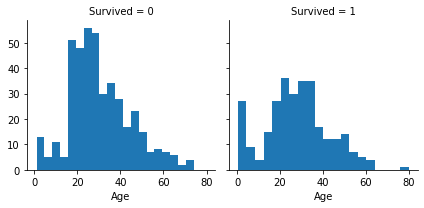

In [67]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

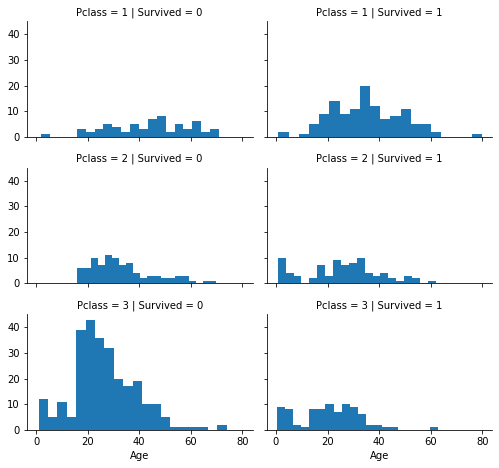

In [68]:
grid = sns.FacetGrid(train_df, col="Survived", row="Pclass", height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', bins=20)
# grid.add_legend()

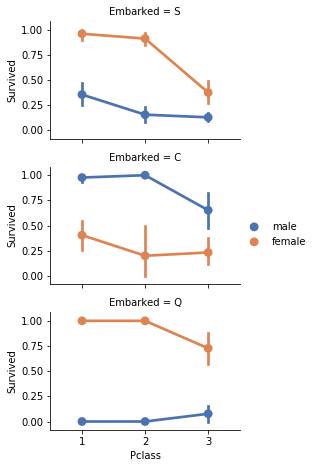

In [72]:
# correlates categorical features
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [74]:
# wrangling data: ...skipped for now...

In [88]:
X_train = train_df.drop(columns=["Survived", "PassengerId", "Name", "Cabin"], axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop(columns=["PassengerId", "Name", "Cabin"], axis=1).copy()
print(X_train.shape, Y_train.shape, X_test.shape)

X_train.columns, Y_train.name, X_test.columns

(891, 8) (891,) (418, 8)


(Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked'], dtype='object'),
 'Survived',
 Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked'], dtype='object'))

In [89]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

ValueError: could not convert string to float: 'male'